In [50]:
# Adding needed libraries and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [51]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]

# train과 test부분의 null값들의 합들을 구한 뒤 하나의 표로 만든다!

,Train,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [53]:
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [54]:
# Spliting to features and lables and deleting variable I don't need
# train_labels = train.pop('SalePrice')

features = pd.concat([train, test], keys=['train', 'test'])

# I decided to get rid of features that have more than half of missing information or do not correlate to SalePrice
# 쓸데 없는 
train.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

In [55]:
# Spliting to features and lables and deleting variable I don't need
# train_labels = train.pop('SalePrice')

# features = pd.concat([train, test], keys=['train', 'test'])

# I decided to get rid of features that have more than half of missing information or do not correlate to SalePrice
# 쓸데 없는 
test.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

In [56]:
train_labels = 'SalePrice'

In [57]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,...,Attchd,RFn,2,TA,Y,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,...,Attchd,RFn,2,TA,Y,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,...,Attchd,RFn,2,TA,Y,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,...,Detchd,Unf,3,TA,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,...,Attchd,RFn,3,TA,Y,12,2008,WD,Normal,250000


In [58]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,...,NaN,Attchd,Unf,1.0,TA,Y,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,...,NaN,Attchd,Unf,1.0,TA,Y,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,...,TA,Attchd,Fin,2.0,TA,Y,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,...,Gd,Attchd,Fin,2.0,TA,Y,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,...,NaN,Attchd,RFn,2.0,TA,Y,1,2010,WD,Normal


In [59]:
# MSSubClass as str
# train['MSSubClass'] = train['MSSubClass'].astype(str)

# MSZoning NA in pred. filling with most popular values
# na값은 최빈값으로 대체
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

# LotFrontage  NA in all. I suppose NA means 0
# na값을 평균값으로 
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

# Alley  NA in all. NA means no access
# na값을 NOACEESS로 대체
train['Alley'] = train['Alley'].fillna('NOACCESS')

# Converting OverallCond to str
train.OverallCond = train.OverallCond.astype(str)

# MasVnrType NA in all. filling with most popular values
# MasVnrType도 최빈값으로 채움
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# NA in all. NA means No basement
# bsmt관련 컬럼의 na값은 NoBSMT로 대체
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('NoBSMT')

# TotalBsmtSF  NA in pred. I suppose NA means 0
# na값을 0으로 대체
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(0)

# Electrical NA in pred. filling with most popular values
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

# KitchenAbvGr to categorical
train['KitchenAbvGr'] = train['KitchenAbvGr'].astype(str)

# KitchenQual NA in pred. filling with most popular values
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

# FireplaceQu  NA in all. NA means No Fireplace
train['FireplaceQu'] = train['FireplaceQu'].fillna('NoFP')

# GarageType, GarageFinish, GarageQual  NA in all. NA means No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    train[col] = train[col].fillna('NoGRG')

# GarageCars  NA in pred. I suppose NA means 0
train['GarageCars'] = train['GarageCars'].fillna(0.0)

# SaleType NA in pred. filling with most popular values
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])

# Year and Month to categorical
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor train
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [60]:
# MSSubClass as str
# test['MSSubClass'] = test['MSSubClass'].astype(str)

# MSZoning NA in pred. filling with most popular values
# na값은 최빈값으로 대체
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

# LotFrontage  NA in all. I suppose NA means 0
# na값을 평균값으로 
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

# Alley  NA in all. NA means no access
# na값을 NOACEESS로 대체
test['Alley'] = test['Alley'].fillna('NOACCESS')

# Converting OverallCond to str
test.OverallCond = test.OverallCond.astype(str)

# MasVnrType NA in all. filling with most popular values
# MasVnrType도 최빈값으로 채움
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# NA in all. NA means No basement
# bsmt관련 컬럼의 na값은 NoBSMT로 대체
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col] = test[col].fillna('NoBSMT')

# TotalBsmtSF  NA in pred. I suppose NA means 0
# na값을 0으로 대체
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)

# Electrical NA in pred. filling with most popular values
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

# KitchenAbvGr to categorical
test['KitchenAbvGr'] = test['KitchenAbvGr'].astype(str)

# KitchenQual NA in pred. filling with most popular values
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

# FireplaceQu  NA in all. NA means No Fireplace
test['FireplaceQu'] = test['FireplaceQu'].fillna('NoFP')

# GarageType, GarageFinish, GarageQual  NA in all. NA means No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    test[col] = test[col].fillna('NoGRG')

# GarageCars  NA in pred. I suppose NA means 0
test['GarageCars'] = test['GarageCars'].fillna(0.0)

# SaleType NA in pred. filling with most popular values
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

# Year and Month to categorical
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor test
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [61]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'TotalSF'],
      dtype='object')

In [62]:
feature_names

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'TotalSF']

In [63]:
type(feature_names)

list

In [64]:
feature_names = list()

for i in train.columns:
    if i == "SalePrice":
        continue
    else:
        feature_names.append(i)
        
len(feature_names)

54

In [65]:
label_name = train_labels
label_name

'SalePrice'

In [66]:
X_train = train[feature_names]

X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1,60,RL,65.000000,8450,Pave,NOACCESS,Reg,Lvl,Inside,...,Attchd,RFn,2,TA,Y,2,2008,WD,Normal,2566
1,2,20,RL,80.000000,9600,Pave,NOACCESS,Reg,Lvl,FR2,...,Attchd,RFn,2,TA,Y,5,2007,WD,Normal,2524
2,3,60,RL,68.000000,11250,Pave,NOACCESS,IR1,Lvl,Inside,...,Attchd,RFn,2,TA,Y,9,2008,WD,Normal,2706
3,4,70,RL,60.000000,9550,Pave,NOACCESS,IR1,Lvl,Corner,...,Detchd,Unf,3,TA,Y,2,2006,WD,Abnorml,2473
4,5,60,RL,84.000000,14260,Pave,NOACCESS,IR1,Lvl,FR2,...,Attchd,RFn,3,TA,Y,12,2008,WD,Normal,3343
5,6,50,RL,85.000000,14115,Pave,NOACCESS,IR1,Lvl,Inside,...,Attchd,Unf,2,TA,Y,10,2009,WD,Normal,2158
6,7,20,RL,75.000000,10084,Pave,NOACCESS,Reg,Lvl,Inside,...,Attchd,RFn,2,TA,Y,8,2007,WD,Normal,3380
7,8,60,RL,70.049958,10382,Pave,NOACCESS,IR1,Lvl,Corner,...,Attchd,RFn,2,TA,Y,11,2009,WD,Normal,3197
8,9,50,RM,51.000000,6120,Pave,NOACCESS,Reg,Lvl,Inside,...,Detchd,Unf,2,Fa,Y,4,2008,WD,Abnorml,2726
9,10,190,RL,50.000000,7420,Pave,NOACCESS,Reg,Lvl,Corner,...,Attchd,RFn,1,Gd,Y,1,2008,WD,Normal,2068


In [67]:
X_test = test[feature_names]
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1461,20,RH,80.000000,11622,Pave,NOACCESS,Reg,Lvl,Inside,...,Attchd,Unf,1.0,TA,Y,6,2010,WD,Normal,1778.0
1,1462,20,RL,81.000000,14267,Pave,NOACCESS,IR1,Lvl,Corner,...,Attchd,Unf,1.0,TA,Y,6,2010,WD,Normal,2658.0
2,1463,60,RL,74.000000,13830,Pave,NOACCESS,IR1,Lvl,Inside,...,Attchd,Fin,2.0,TA,Y,3,2010,WD,Normal,2557.0
3,1464,60,RL,78.000000,9978,Pave,NOACCESS,IR1,Lvl,Inside,...,Attchd,Fin,2.0,TA,Y,6,2010,WD,Normal,2530.0
4,1465,120,RL,43.000000,5005,Pave,NOACCESS,IR1,HLS,Inside,...,Attchd,RFn,2.0,TA,Y,1,2010,WD,Normal,2560.0
5,1466,60,RL,75.000000,10000,Pave,NOACCESS,IR1,Lvl,Corner,...,Attchd,Fin,2.0,TA,Y,4,2010,WD,Normal,2418.0
6,1467,20,RL,68.580357,7980,Pave,NOACCESS,IR1,Lvl,Inside,...,Attchd,Fin,2.0,TA,Y,3,2010,WD,Normal,2355.0
7,1468,60,RL,63.000000,8402,Pave,NOACCESS,IR1,Lvl,Inside,...,Attchd,Fin,2.0,TA,Y,5,2010,WD,Normal,2254.0
8,1469,20,RL,85.000000,10176,Pave,NOACCESS,Reg,Lvl,Inside,...,Attchd,Unf,2.0,TA,Y,2,2010,WD,Normal,2641.0
9,1470,20,RL,70.000000,8400,Pave,NOACCESS,Reg,Lvl,Corner,...,Attchd,Fin,2.0,TA,Y,4,2010,WD,Normal,1764.0


In [68]:
y_train = train['SalePrice']
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [69]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators = 10,
                       random_state = 37)
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [72]:
# import numpy as np
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import log_loss

# X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
#     train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

# n_estimators = 10
# num_loop = 10

# early_stopping_rounds = 20  # 안좋아지기 시작하면 멈추는 것. 10에서 20정도를 줌
# coarse_hyperparameters_list = list()

# for loop in range(num_loop):
#     # learning_rate(데이터의 앞부분과 뒷부분의 비율, n_estimators와 반비례 관계를 가져야함. 낮아지면 n_estimator를 높여야함)
#     # num_leaves(가지치기) - 
#     # max_bin(가지를 칠 때 숫자데이터에 구역을 나눠줌. 많으면 종류가 많아져서 속도가 느림. 적당한 값이 좋음.) - 
#     # min_child_samples(하나의 리프에 몇개의 데이터가 들어가는지) -
#     # subsample(줄여서 데이터를 넣을 때 얼만큼의 데이터를 넣는지) - 
#     # colsample_bytree(컬럼의 subsample)
#     # subsample_freq(트리를 만들 때마다 매번 데이터를 할 것이냐? 매번 하면 좋음. 1이 매번 하는 것. 10이면 10번마다 한번씩)
#     learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
#     num_leaves = np.random.randint(2, 500)
#     max_bin = np.random.randint(2, 500)
#     min_child_samples = np.random.randint(2, 500)
#     subsample = np.random.uniform(low = 0.1, high = 1.0)
#     colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
#     model = LGBMClassifier(learning_rate = learning_rate,
#                            num_leaves = num_leaves,
#                            max_bin = max_bin,
#                            min_child_samples = min_child_samples,
#                            subsample = subsample,
#                            colsample_bytree = colsample_bytree,
#                            n_estimators = n_estimators,
#                            subsample_freq = 1,
#                            class_type = 'balanced',   # balanced는 틀렸을 때는 패널티 맞췄을 때 어드밴티지.
#                           random_state = 37)
    
    
#     model.fit(X_train_kf, y_train_kf,
#              eval_set = [(X_test_kf, y_test_kf)])
#     score = log_loss(y_test_kf, y_predict_test_kf)
    
#     coarse_hyperparameters_list.append({
#         'n_estimators' : n_estimators,
#         'learning_rate' : learning_rate,
#         'num_leaves' : num_leaves,
#         'max_bin' : max_bin,
#         'min_child_samples' : min_child_samples,
#         'subsample' : subsample,
#         'colsample_bytree' : colsample_bytree,
#         'subsample_freq' : 1,
#         'class_type' : 'balanced',
#         'random_state' : 37,
#         'score' : score
#     })
    
#     print(f"Score = {score:.5f}")
    
# coarse_hyperparameters_list = pd.DataFrame(coarse_hyperparameters_list)
# coarse_hyperparameters_list.sort_values(by = "score")

# coarse_hyperparameters_list.head()

ValueError: y contains new labels: [ 35311  58500  64500  72500  75000  80500  85500  87500  89471  91300
  94000  94750  97500 101000 103000 105900 107400 108959 116000 118400
 119750 121500 128200 132250 134900 135960 136905 138800 138887 139500
 142600 143900 145250 146500 147400 153337 153575 154500 154900 156500
 156932 158500 159434 159950 163500 163900 163990 169500 169900 169990
 171500 171750 171900 172000 172400 172785 178740 179500 179540 179600
 181900 182000 183200 184750 186500 187750 188700 192140 194201 194700
 198900 200100 201800 204750 205950 206000 206300 208500 209500 212900
 213250 214500 216000 218000 223000 223500 224900 226700 233000 233170
 233230 235128 239500 239799 244600 245500 252000 253000 253293 254000
 255000 255500 257000 259500 261500 263000 264132 265000 265900 269790
 274300 274725 274970 279500 281000 281213 294000 299800 301000 303477
 313000 315500 317000 318061 326000 333168 337000 339750 341000 348000
 354000 367294 370878 372500 374000 375000 377500 378500 392500 394617
 403000 412500 430000 451950 465000 556581 745000]

In [85]:
# train

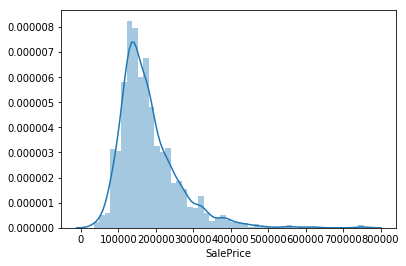

In [86]:
# Our SalesPrice is skewed right (check plot below). I'm logtransforming it. 
# displot의 y축은 확률 모든 것을 다 합하면 1임.
ax = sns.distplot(train_labels)

In [87]:
# train_labels = np.log(train_labels)

In [88]:
# train_labels

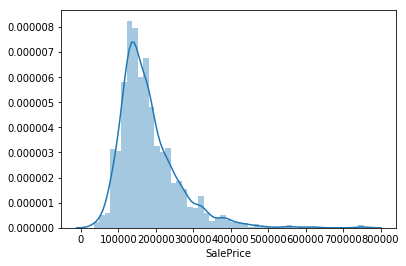

In [89]:
train_labels를 log화 한 뒤 그래프
ax = sns.distplot(train_labels)

In [91]:
## Standardizing numeric features
# numeric_features -> features에서 저 4개의 컬럼만 뽑기
# numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
# 표준화
# numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

In [92]:
# numeric_features_standardized

In [93]:
features

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
train 0        1          60       RL         65.0     8450   Pave   NaN   
      1        2          20       RL         80.0     9600   Pave   NaN   
      2        3          60       RL         68.0    11250   Pave   NaN   
      3        4          70       RL         60.0     9550   Pave   NaN   
      4        5          60       RL         84.0    14260   Pave   NaN   
      5        6          50       RL         85.0    14115   Pave   NaN   
      6        7          20       RL         75.0    10084   Pave   NaN   
      7        8          60       RL          NaN    10382   Pave   NaN   
      8        9          50       RM         51.0     6120   Pave   NaN   
      9       10         190       RL         50.0     7420   Pave   NaN   
      10      11          20       RL         70.0    11200   Pave   NaN   
      11      12          60       RL         85.0    11924   Pave   NaN   
      12      13          20       RL          NaN    12968   Pave   NaN   
      13      14          20       RL         91.0    10652   Pave   NaN   
      14      15          20       RL          NaN    10920   Pave   NaN   
      15      16          45       RM         51.0     6120   Pave   NaN   
      16      17          20       RL          NaN    11241   Pave   NaN   
      17      18          90       RL         72.0    10791   Pave   NaN   
      18      19          20       RL         66.0    13695   Pave   NaN   
      19      20          20       RL         70.0     7560   Pave   NaN   
      20      21          60       RL        101.0    14215   Pave   NaN   
      21      22          45       RM         57.0     7449   Pave  Grvl   
      22      23          20       RL         75.0     9742   Pave   NaN   
      23      24         120       RM         44.0     4224   Pave   NaN   
      24      25          20       RL          NaN     8246   Pave   NaN   
      25      26          20       RL        110.0    14230   Pave   NaN   
      26      27          20       RL         60.0     7200   Pave   NaN   
      27      28          20       RL         98.0    11478   Pave   NaN   
      28      29          20       RL         47.0    16321   Pave   NaN   
      29      30          30       RM         60.0     6324   Pave   NaN   
...          ...         ...      ...          ...      ...    ...   ...   
test  1429  2890          30       RM         50.0     7030   Pave   NaN   
      1430  2891          50       RM         75.0     9060   Pave   NaN   
      1431  2892          30  C (all)         69.0    12366   Pave   NaN   
      1432  2893         190  C (all)         50.0     9000   Pave   NaN   
      1433  2894          50  C (all)         60.0     8520   Grvl   NaN   
      1434  2895         120       RM         41.0     5748   Pave   NaN   
      1435  2896         120       RM         44.0     3842   Pave   NaN   
      1436  2897          20       RL         69.0    23580   Pave   NaN   
      1437  2898          90       RL         65.0     8385   Pave   NaN   
      1438  2899          20       RL         70.0     9116   Pave   NaN   
      1439  2900          80       RL        140.0    11080   Pave   NaN   
      1440  2901          20       RL          NaN    50102   Pave   NaN   
      1441  2902          20       RL          NaN     8098   Pave   NaN   
      1442  2903          20       RL         95.0    13618   Pave   NaN   
      1443  2904          20       RL         88.0    11577   Pave   NaN   
      1444  2905          20      NaN        125.0    31250   Pave   NaN   
      1445  2906          90       RM         78.0     7020   Pave   NaN   
      1446  2907         160       RM         41.0     2665   Pave   NaN   
      1447  2908          20       RL         58.0    10172   Pave   NaN   
      1448  2909          90       RL          NaN    11836   Pave   NaN   
      1449  2910         180       RM         21.0     1470   

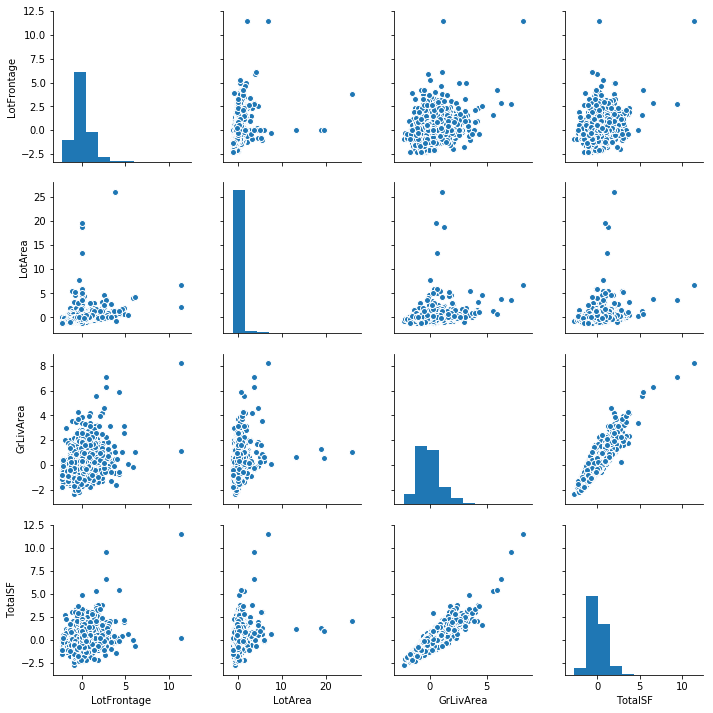

In [53]:
# pairplot은 각 column별로 데이터 상관관계나 분류적 특성을 한눈에 볼 수 있음.
ax = sns.pairplot(numeric_features_standardized)

### Converting categorical data to dummies

In [94]:
# # Getting Dummies from Condition1 and Condition2
# conditions = set([x for x in train['Condition1']] + [x for x in train['Condition2']])
# dummies = pd.DataFrame(data=np.zeros((len(train.index), len(conditions))),
#                        index=train.index, columns=conditions)

# # zip 은 하나로 모아주는 역할
# # enumerate는 range와 비슷하다고 생각하면 될듯.
# for i, cond in enumerate(zip(train['Condition1'], train['Condition2'])):
#     dummies.ix[i, cond] = 1
# train = pd.concat([train, dummies.add_prefix('Condition_')], axis=1)
# train.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

# # Getting Dummies from Exterior1st and Exterior2nd
# exteriors = set([x for x in train['Exterior1st']] + [x for x in train['Exterior2nd']])
# dummies = pd.DataFrame(data=np.zeros((len(train.index), len(exteriors))),
#                        index=train.index, columns=exteriors)

# for i, ext in enumerate(zip(train['Exterior1st'], train['Exterior2nd'])):
#     dummies.ix[i, ext] = 1
# train = pd.concat([train, dummies.add_prefix('Exterior_')], axis=1)
# train.drop(['Exterior1st', 'Exterior2nd', 'Exterior_nan'], axis=1, inplace=True)

# # Getting Dummies from all other categorical vars
# for col in train.dtypes[train.dtypes == 'object'].index:
#     for_dummy = train.pop(col)
#     train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

KeyError: "labels ['Exterior_nan'] not contained in axis"

In [95]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,Exterior_WdShing,Exterior_AsbShng,Exterior_CmentBd,Exterior_Wd Shng,Exterior_Plywood,Exterior_VinylSd,Exterior_HdBoard,Exterior_CemntBd,Exterior_Wd Sdng,Exterior_BrkFace
0,1,60,RL,65.0,8450,Pave,NOACCESS,Reg,Lvl,Inside,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20,RL,80.0,9600,Pave,NOACCESS,Reg,Lvl,FR2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,60,RL,68.0,11250,Pave,NOACCESS,IR1,Lvl,Inside,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,70,RL,60.0,9550,Pave,NOACCESS,IR1,Lvl,Corner,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,60,RL,84.0,14260,Pave,NOACCESS,IR1,Lvl,FR2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
# ### Copying features
# features_standardized = features.copy()

# ### Replacing numeric features by standardized values
# features_standardized.update(numeric_features_standardized)

In [57]:
# features_standardized

Id   LotFrontage   LotArea  OverallQual  YearBuilt  \
train 0        1 -2.020329e-01 -0.217841            7       2003   
      1        2  5.017845e-01 -0.072032            6       1976   
      2        3 -6.126943e-02  0.137173            7       2001   
      3        4 -4.366387e-01 -0.078371            7       1915   
      4        5  6.894691e-01  0.518814            8       2000   
      5        6  7.363903e-01  0.500430            5       1993   
      6        7  2.671787e-01 -0.010665            8       2004   
      7        8 -1.800332e-14  0.027119            7       1973   
      8        9 -8.589292e-01 -0.513264            7       1931   
      9       10 -9.058503e-01 -0.348436            5       1939   
      10      11  3.257289e-02  0.130834            5       1965   
      11      12  7.363903e-01  0.222630            9       2005   
      12      13 -1.800332e-14  0.355000            5       1962   
      13      14  1.017917e+00  0.061352            7       2006   
      14      15 -1.800332e-14  0.095332            6       1960   
      15      16 -8.589292e-01 -0.513264            7       1929   
      16      17 -1.800332e-14  0.136032            6       1970   
      17      18  1.264152e-01  0.078976            4       1967   
      18      19 -1.551118e-01  0.447177            5       2004   
      19      20  3.257289e-02 -0.330685            5       1958   
      20      21  1.487129e+00  0.513109            8       2005   
      21      22 -5.774022e-01 -0.344759            7       1930   
      22      23  2.671787e-01 -0.054027            8       2002   
      23      24 -1.187377e+00 -0.753660            5       1976   
      24      25 -1.800332e-14 -0.243707            5       1968   
      25      26  1.909419e+00  0.515010            8       2007   
      26      27 -4.366387e-01 -0.376330            5       1951   
      27      28  1.346365e+00  0.166082            8       2007   
      28      29 -1.046614e+00  0.780130            5       1957   
      29      30 -4.366387e-01 -0.487399            4       1927   
...          ...           ...       ...          ...        ...   
test  1429  2890 -9.058503e-01 -0.397885            4       1925   
      1430  2891  2.671787e-01 -0.140499            6       1957   
      1431  2892 -1.434827e-02  0.278672            3       1945   
      1432  2893 -9.058503e-01 -0.148106            5       1951   
      1433  2894 -4.366387e-01 -0.208966            3       1916   
      1434  2895 -1.328141e+00 -0.560431            8       2005   
      1435  2896 -1.187377e+00 -0.802094            8       2004   
      1436  2897 -1.434827e-02  1.700506            6       1979   
      1437  2898 -2.020329e-01 -0.226083            6       1978   
      1438  2899  3.257289e-02 -0.133399            8       2001   
      1439  2900  3.317054e+00  0.115619            6       1975   
      1440  2901 -1.800332e-14  5.063257            6       1958   
      1441  2902 -1.800332e-14 -0.262472            6       2000   
      1442  2903  1.205602e+00  0.437414            8       2005   
      1443  2904  8.771538e-01  0.178634            9       2005   
      1444  2905  2.613237e+00  2.672993            1       1951   
      1445  2906  4.079422e-01 -0.399152            7       1997   
      1446  2907 -1.328141e+00 -0.951327            5       1977   
      1447  2908 -5.304810e-01  0.000493            5       1968   
      1448  2909 -1.800332e-14  0.211473            5       1970   
      1449  2910 -2.266564e+00 -1.102842            4       1970   
      1450  2911 -2.266564e+00 -1.101067            4       1972   
      1451  2912  5.017845e-01  0.407745            5       1969   
      1452  2913 -2.266564e+00 -1.094855            4       1970   
      1453  2914 -2.266564e+00 -1.095742            4       1970   
      1454  2915 -2.266564e+00 -1.043758            4       1970   
      1455  2916 -2.266564e+00 -1.049083            4       1970   
  

In [96]:
# ### Splitting features
# train_features = features.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
# test_features = features.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

# ### Splitting standardized features
# train_features_st = features_standardized.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
# test_features_st = features_standardized.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

In [59]:
### Shuffling train sets
# train_features_st, train_features, train_labels = shuffle(train_features_st, train_features, train_labels, random_state = 5)

In [60]:
# ### Splitting
# x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
# x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)

In [61]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train_st, y_train_st)
train_test(ENSTest, x_train_st, x_test_st, y_train_st, y_test_st)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.9009282963511264
RMSE: 0.11921419401983763
Test
R2: 0.8967299342146008
RMSE: 0.11097043120322074


In [62]:
# # Average R2 score and standart deviation of 5-fold cross-validation
# scores = cross_val_score(ENSTest, train_features_st, train_labels, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.10)


In [63]:
# GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
#                                                min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
# train_test(GBest, x_train, x_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.9607176378850729
RMSE: 0.07724247301122114
Test
R2: 0.8995222019145783
RMSE: 0.10969650245345929


In [64]:
# # Average R2 score and standart deviation of 5-fold cross-validation
# scores = cross_val_score(GBest, train_features_st, train_labels, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.04)


In [65]:
# # Retraining models
# GB_model = GBest.fit(train_features, train_labels)
# ENST_model = ENSTest.fit(train_features_st, train_labels)

In [66]:
# ## Getting our SalePrice estimation
# Final_labels = (np.exp(GB_model.predict(test_features)) + np.exp(ENST_model.predict(test_features_st))) / 2

In [67]:
# ## Saving to CSV
# pd.DataFrame({'Id': test.Id, 'SalePrice': Final_labels}).to_csv('submisstion.csv', index =False) 

In [68]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators = 10,
                       random_state = 37)
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [71]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()

In [72]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,200, 300, 500,700, 900]
criterion = ['gini', 'entropy']
depth = [3,5,10,15]
min_split=[2,3,4]
min_leaf=[2,3,4]
bootstrap = ['True', 'False']
verbose = [5]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':depth,
    'criterion':criterion,
    'bootstrap':bootstrap,
    'verbose':verbose,
    'min_samples_split':min_split,
    'min_samples_leaf':min_leaf
    }

random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=hyperparameter_grid,
                               cv=5, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = 4, 
                               return_train_score = True,
                               random_state=42)

In [75]:
random_cv.fit(x_train_st,y_train_st)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000001F8A73E6E40, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\anaconda3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001F8A73E6E40, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\anaconda3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(888, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(888, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (888, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=888, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'random_cv.fit(x_train_st,y_train_st)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 8, 10, 9, 56, 54, 140443, tzinfo=tzutc()), 'msg_id': '6466e18fc3f44777ad922aa4059a711e', 'msg_type': 'execute_request', 'session': '835501dea2da464980a24eb2c786d5ff', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6466e18fc3f44777ad922aa4059a711e', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'835501dea2da464980a24eb2c786d5ff']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'random_cv.fit(x_train_st,y_train_st)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 8, 10, 9, 56, 54, 140443, tzinfo=tzutc()), 'msg_id': '6466e18fc3f44777ad922aa4059a711e', 'msg_type': 'execute_request', 'session': '835501dea2da464980a24eb2c786d5ff', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6466e18fc3f44777ad922aa4059a711e', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'835501dea2da464980a24eb2c786d5ff'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'random_cv.fit(x_train_st,y_train_st)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 8, 10, 9, 56, 54, 140443, tzinfo=tzutc()), 'msg_id': '6466e18fc3f44777ad922aa4059a711e', 'msg_type': 'execute_request', 'session': '835501dea2da464980a24eb2c786d5ff', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6466e18fc3f44777ad922aa4059a711e', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='random_cv.fit(x_train_st,y_train_st)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'random_cv.fit(x_train_st,y_train_st)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('random_cv.fit(x_train_st,y_train_st)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('random_cv.fit(x_train_st,y_train_st)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='random_cv.fit(x_train_st,y_train_st)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'random_cv.fit(x_train_st,y_train_st)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='random_cv.fit(x_train_st,y_train_st)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-75-389f0cb7866b>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1f8b0d0a0b8, executio...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001F8AF8F64B0, file "<ipython-input-75-389f0cb7866b>", line 1>
        result = <ExecutionResult object at 1f8b0d0a0b8, executio...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001F8AF8F64B0, file "<ipython-input-75-389f0cb7866b>", line 1>, result=<ExecutionResult object at 1f8b0d0a0b8, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001F8AF8F64B0, file "<ipython-input-75-389f0cb7866b>", line 1>
        self.user_global_ns = {'ENST_model': ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01...=None, selection='cyclic', tol=0.0001, verbose=0), 'ENSTest': ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01...=None, selection='cyclic', tol=0.0001, verbose=0), 'Final_labels': array([118719.55890552, 155229.97248048, 181261....3488.24854221, 122956.63543249, 221815.74660593]), 'GB_model': GradientBoostingRegressor(alpha=0.9, criterion='...le=1.0, verbose=0,
             warm_start=False), 'GBest': GradientBoostingRegressor(alpha=0.9, criterion='...le=1.0, verbose=0,
             warm_start=False), 'In': ['', "# Adding needed libraries and reading data\nimpor...d_csv('train.csv')\ntest = pd.read_csv('test.csv')", 'train.head()', 'NAs = pd.concat([train.isnull().sum(), test.isnu...0]\n\n# train과 test부분의 null값들의 합들을 구한 뒤 하나의 표로 만든다!', 'def get_score(prediction, lables):    \n    print...int("Test")\n    get_score(prediction_test, y_tst)', "# Spliting to features and lables and deleting v..., 'MiscVal'],\n              axis=1, inplace=True)", "# MSSubClass as str\nfeatures['MSSubClass'] = fea...', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)", '# Our SalesPrice is skewed right (check plot bel...률 모든 것을 다 합하면 1임.\nax = sns.distplot(train_labels)', 'train_labels = np.log(train_labels)', 'train_labels', '# train_labels를 log화 한 뒤 그래프\nax = sns.distplot(train_labels)', '## Standardizing numeric features\n# numeric_feat...- numeric_features.mean())/numeric_features.std()', 'numeric_features_standardized', 'features', '# pairplot은 각 column별로 데이터 상관관계나 분류적 특성을 한눈에 볼 수...\nax = sns.pairplot(numeric_features_standardized)', '# Getting Dummies from Condition1 and Condition2..., pd.get_dummies(for_dummy, prefix=col)], axis=1)', 'features.head()', '### Copying features\nfeatures_standardized = fea...tandardized.update(numeric_features_standardized)', 'features_standardized', '### Splitting features\ntrain_features = features...axis=1).select_dtypes(include=[np.number]).values', ...], 'LGBMClassifier': <class 'lightgbm.sklearn.LGBMClassifier'>, 'NAs':                Train    Test
1stFlrSF           ...Sold             0     0.0

[81 rows x 2 columns], 'Out': {2:    Id  MSSubClass MSZoning  LotFrontage  LotArea...       Normal     250000  

[5 rows x 81 columns], 3:               Train    Test
Alley          1369 ...smtSF       0     1.0
Utilities         0     2.0, 9: 0       12.247694
1       12.109011
2       12.3...583
Name: SalePrice, Length: 1460, dtype: float64, 12:              LotFrontage   LotArea  GrLivArea   ...608   0.986541  0.557081

[2919 rows x 4 columns], 13:               Id MSSubClass MSZoning  LotFrontag...      Normal   2996.0  

[2919 rows x 54 columns], 16:          Id  LotFrontage  LotArea  OverallQual  ...                      0  

[5 rows x 263 columns], 18:               Id   LotFrontage   LotArea  Overal...                   0  

[2919 rows x 263 columns], 35: LGBMClassifier(boosting_type='gbdt', class_weigh...=1.0, subsample_for_bin=200000, subsample_freq=0), 41:    Id  MSSubClass MSZoning  LotFrontage  LotArea...       Normal     250000  

[5 rows x 81 columns], 42:               Train    Test
Alley          1369 ...smtSF       0     1.0
Utilities         0     2.0, ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
        self.user_ns = {'ENST_model': ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01...=None, selection='cyclic', tol=0.0001, verbose=0), 'ENSTest': ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01...=None, selection='cyclic', tol=0.0001, verbose=0), 'Final_labels': array([118719.55890552, 155229.97248048, 181261....3488.24854221, 122956.63543249, 221815.74660593]), 'GB_model': GradientBoostingRegressor(alpha=0.9, criterion='...le=1.0, verbose=0,
             warm_start=False), 'GBest': GradientBoostingRegressor(alpha=0.9, criterion='...le=1.0, verbose=0,
             warm_start=False), 'In': ['', "# Adding needed libraries and reading data\nimpor...d_csv('train.csv')\ntest = pd.read_csv('test.csv')", 'train.head()', 'NAs = pd.concat([train.isnull().sum(), test.isnu...0]\n\n# train과 test부분의 null값들의 합들을 구한 뒤 하나의 표로 만든다!', 'def get_score(prediction, lables):    \n    print...int("Test")\n    get_score(prediction_test, y_tst)', "# Spliting to features and lables and deleting v..., 'MiscVal'],\n              axis=1, inplace=True)", "# MSSubClass as str\nfeatures['MSSubClass'] = fea...', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)", '# Our SalesPrice is skewed right (check plot bel...률 모든 것을 다 합하면 1임.\nax = sns.distplot(train_labels)', 'train_labels = np.log(train_labels)', 'train_labels', '# train_labels를 log화 한 뒤 그래프\nax = sns.distplot(train_labels)', '## Standardizing numeric features\n# numeric_feat...- numeric_features.mean())/numeric_features.std()', 'numeric_features_standardized', 'features', '# pairplot은 각 column별로 데이터 상관관계나 분류적 특성을 한눈에 볼 수...\nax = sns.pairplot(numeric_features_standardized)', '# Getting Dummies from Condition1 and Condition2..., pd.get_dummies(for_dummy, prefix=col)], axis=1)', 'features.head()', '### Copying features\nfeatures_standardized = fea...tandardized.update(numeric_features_standardized)', 'features_standardized', '### Splitting features\ntrain_features = features...axis=1).select_dtypes(include=[np.number]).values', ...], 'LGBMClassifier': <class 'lightgbm.sklearn.LGBMClassifier'>, 'NAs':                Train    Test
1stFlrSF           ...Sold             0     0.0

[81 rows x 2 columns], 'Out': {2:    Id  MSSubClass MSZoning  LotFrontage  LotArea...       Normal     250000  

[5 rows x 81 columns], 3:               Train    Test
Alley          1369 ...smtSF       0     1.0
Utilities         0     2.0, 9: 0       12.247694
1       12.109011
2       12.3...583
Name: SalePrice, Length: 1460, dtype: float64, 12:              LotFrontage   LotArea  GrLivArea   ...608   0.986541  0.557081

[2919 rows x 4 columns], 13:               Id MSSubClass MSZoning  LotFrontag...      Normal   2996.0  

[2919 rows x 54 columns], 16:          Id  LotFrontage  LotArea  OverallQual  ...                      0  

[5 rows x 263 columns], 18:               Id   LotFrontage   LotArea  Overal...                   0  

[2919 rows x 263 columns], 35: LGBMClassifier(boosting_type='gbdt', class_weigh...=1.0, subsample_for_bin=200000, subsample_freq=0), 41:    Id  MSSubClass MSZoning  LotFrontage  LotArea...       Normal     250000  

[5 rows x 81 columns], 42:               Train    Test
Alley          1369 ...smtSF       0     1.0
Utilities         0     2.0, ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\sik\jupyter\house-prices-advanced-regression-techniques\<ipython-input-75-389f0cb7866b> in <module>()
----> 1 random_cv.fit(x_train_st,y_train_st)

...........................................................................
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=RandomizedSearchCV(cv=5, error_score='raise',
  ...g='neg_mean_absolute_error',
          verbose=0), X=array([[-1.80033248e-14, -7.55818886e-02,  8.000...00000000e+00,  1.00000000e+00,  0.00000000e+00]]), y=1312    12.618182
1206    11.580584
1154    12.2...820
Name: SalePrice, Length: 1314, dtype: float64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=None, shuffle=False)>
        X = array([[-1.80033248e-14, -7.55818886e-02,  8.000...00000000e+00,  1.00000000e+00,  0.00000000e+00]])
        y = 1312    12.618182
1206    11.580584
1154    12.2...820
Name: SalePrice, Length: 1314, dtype: float64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Aug 10 18:56:55 2020
PID: 16156                            Python 3.6.5: C:\anaconda3\python.exe
...........................................................................
C:\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap='True', class_w...te=None, verbose=5,
            warm_start=False), memmap([[-1.80033248e-14, -7.55818886e-02,  8.00...00000000e+00,  1.00000000e+00,  0.00000000e+00]]), 1312    12.618182
1206    11.580584
1154    12.2...820
Name: SalePrice, Length: 1314, dtype: float64, {'score': make_scorer(mean_absolute_error, greater_is_better=False)}, array([ 263,  264,  265, ..., 1311, 1312, 1313]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 255, 256, 257, 258, 259,
       260, 261, 262]), 0, {'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'verbose': 5}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap='True', class_w...te=None, verbose=5,
            warm_start=False), memmap([[-1.80033248e-14, -7.55818886e-02,  8.00...00000000e+00,  1.00000000e+00,  0.00000000e+00]]), 1312    12.618182
1206    11.580584
1154    12.2...820
Name: SalePrice, Length: 1314, dtype: float64, {'score': make_scorer(mean_absolute_error, greater_is_better=False)}, array([ 263,  264,  265, ..., 1311, 1312, 1313]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 255, 256, 257, 258, 259,
       260, 261, 262]), 0, {'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'verbose': 5})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap='True', class_w...te=None, verbose=5,
            warm_start=False), X=memmap([[-1.80033248e-14, -7.55818886e-02,  8.00...00000000e+00,  1.00000000e+00,  0.00000000e+00]]), y=1312    12.618182
1206    11.580584
1154    12.2...820
Name: SalePrice, Length: 1314, dtype: float64, scorer={'score': make_scorer(mean_absolute_error, greater_is_better=False)}, train=array([ 263,  264,  265, ..., 1311, 1312, 1313]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 255, 256, 257, 258, 259,
       260, 261, 262]), verbose=0, parameters={'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'verbose': 5}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of RandomForestClas...e=None, verbose=5,
            warm_start=False)>
        X_train = memmap([[-1.80033248e-14, -8.84001179e-01,  7.00...00000000e+00,  1.00000000e+00,  0.00000000e+00]])
        y_train = 559     12.363076
928     12.373703
1327    11.7...820
Name: SalePrice, Length: 1051, dtype: float64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap='True', class_w...te=None, verbose=5,
            warm_start=False), X=array([[-1.8003324e-14, -8.8400120e-01,  7.00000...  1.0000000e+00,  0.0000000e+00]], dtype=float32), y=array([[12.36307639],
       [12.37370349],
    ...26],
       [11.44571672],
       [11.84581988]]), sample_weight=None)
    268             # [:, np.newaxis] that does not.
    269             y = np.reshape(y, (-1, 1))
    270 
    271         self.n_outputs_ = y.shape[1]
    272 
--> 273         y, expanded_class_weight = self._validate_y_class_weight(y)
        y = array([[12.36307639],
       [12.37370349],
    ...26],
       [11.44571672],
       [11.84581988]])
        expanded_class_weight = undefined
        self._validate_y_class_weight = <bound method ForestClassifier._validate_y_class...e=None, verbose=5,
            warm_start=False)>
    274 
    275         if getattr(y, "dtype", None) != DOUBLE or not y.flags.contiguous:
    276             y = np.ascontiguousarray(y, dtype=DOUBLE)
    277 

...........................................................................
C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _validate_y_class_weight(self=RandomForestClassifier(bootstrap='True', class_w...te=None, verbose=5,
            warm_start=False), y=array([[12.36307639],
       [12.37370349],
    ...26],
       [11.44571672],
       [11.84581988]]))
    466             self.oob_decision_function_ = oob_decision_function
    467 
    468         self.oob_score_ = oob_score / self.n_outputs_
    469 
    470     def _validate_y_class_weight(self, y):
--> 471         check_classification_targets(y)
        y = array([[12.36307639],
       [12.37370349],
    ...26],
       [11.44571672],
       [11.84581988]])
    472 
    473         y = np.copy(y)
    474         expanded_class_weight = None
    475 

...........................................................................
C:\anaconda3\lib\site-packages\sklearn\utils\multiclass.py in check_classification_targets(y=array([[12.36307639],
       [12.37370349],
    ...26],
       [11.44571672],
       [11.84581988]]))
    167     y : array-like
    168     """
    169     y_type = type_of_target(y)
    170     if y_type not in ['binary', 'multiclass', 'multiclass-multioutput',
    171                       'multilabel-indicator', 'multilabel-sequences']:
--> 172         raise ValueError("Unknown label type: %r" % y_type)
        y_type = 'continuous'
    173 
    174 
    175 def type_of_target(y):
    176     """Determine the type of data indicated by the target.

ValueError: Unknown label type: 'continuous'
___________________________________________________________________________